
## Mini-Projeto 1 - Fazendo  análise de sentimentos simples com Keras e TensorFlow 2.0

In [48]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


#Este é primeiro projeto do curso de Processamento de Linguagem Natural da Datascience academy


**Definição do Problema**:



Analisar sentimentos de Twiters de usuários brasileiros usando, classificando-os em Positivos ou Negativos 

Foi utilizado o conjunto de dados do kaggle link: https://www.kaggle.com/leonardoassis/portuguese-tweets-nltk-and-sklearn



In [1]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import matplotlib
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

numpy                                      1.18.3
pandas                                     1.0.3
matplotlib                                 3.2.1
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
tensorflow                                 2.1.0
json                                       2.0.9
Data Science Academy


### Carregando os Dados

Cada registro consiste em três atributos:

- Sentimento: 1 se Positivo,0 se Negativo 

In [3]:
df1 = pd.read_csv('Tweets.csv', delimiter=',')
df1.dataframeName = 'Tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 785814 rows and 5 columns


In [4]:
sample_data = df1.sample(n=20000, replace='False')

In [5]:
train_ds= sample_data

In [6]:
# Dados carregados
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 344573 to 574586
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20000 non-null  int64 
 1   tweet_text  20000 non-null  object
 2   tweet_date  20000 non-null  object
 3   sentiment   20000 non-null  object
 4   query_used  20000 non-null  object
dtypes: int64(1), object(4)
memory usage: 937.5+ KB


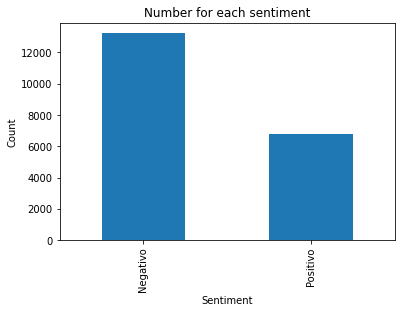

In [7]:
series=train_ds['sentiment'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

In [8]:
# Separando as variáveis
# update classifiers to nominal value
#train_ds[y_col] = train_ds[y_col].map({0: 'Negativo', 1: 'Positivo'})

#train_ds['sentiment']=train_ds['sentiment'].map({0: 'Negativo', 1: 'Positivo'})
train_ds['sentiment']=train_ds['sentiment'].map({'Positivo': 1, 'Negativo': 0})
#pd.Series(np.where(sample.housing.values == 'yes', 1, 0),
 #         sample.index)

In [9]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 344573 to 574586
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20000 non-null  int64 
 1   tweet_text  20000 non-null  object
 2   tweet_date  20000 non-null  object
 3   sentiment   20000 non-null  int64 
 4   query_used  20000 non-null  object
dtypes: int64(2), object(3)
memory usage: 937.5+ KB


In [10]:
y= train_ds['sentiment']
x= train_ds['tweet_text']

### Pré-Processamento dos Dados

Dividindo os dados em treino e teste

O conjunto de dados será dividido em conjunto de dados de treinamento e teste. O modelo será treinado usando o conjunto de dados de treinamento e validado usando novos conjuntos de dados que não são propagados pelo modelo durante o treinamento, os chamados dados de teste. Dessa forma, podemos calcular a performance do modelo.

In [11]:
# Tamanho para a amostra
tamanho_amostra = 15000

In [12]:
# Separando os dados

# Dados de entrada (X)

#x_treino= df1.loc[:tamanho_amostra, lambda df: ['tweet_text']]
#x_teste= df1.loc[tamanho_amostra:, lambda df: ['tweet_text']]

x_treino= x[:tamanho_amostra]
x_teste = x[tamanho_amostra:]



# Dados de saída (Y)
#y_treino = df1.loc[:tamanho_amostra, lambda df: ['sentiment']]
#_teste = df1.loc[tamanho_amostra:, lambda df: ['sentiment']]
y_treino = y[:tamanho_amostra]
y_teste = y[tamanho_amostra:]

### Tokenização

Os modelos de Machine Learning recebem vetores (matrizes de números inteiros) como entrada. Ao trabalhar com texto, devemos criar uma estratégia para converter sequências de caracteres em números (ou "vetorizar" o texto) antes de alimentá-lo no modelo. 

A classe Tokenizer permite vetorizar um corpus de texto (coleção de texto escrito), transformando cada texto em uma sequência de números inteiros ou em um vetor em que o coeficiente de cada token possa ser binário, com base na contagem de palavras ou no tf-idf (term frequency–inverse document frequency).

A função Tokenizer recebe 2 parâmetros:

* num_words: número máximo de palavras a serem mantidas, com base na frequência das palavras. Somente as palavras com a frequência máxima serão mantidas.

* oov_token: usado para substituir palavras fora do vocabulário durante chamadas text_to_sequence

Referência: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [13]:
# Parâmetros
vocabulario = 10000
oov_token = "<OOV>"

In [14]:
# Cria o tokenizer
tokenizer = Tokenizer(num_words = vocabulario, oov_token = oov_token)

In [15]:
# Atualiza o vocabulário interno com base em uma lista de textos.
tokenizer.fit_on_texts(x_treino)

In [16]:

# Transforma cada texto em textos em uma sequência de números inteiros. 
# Somente as palavras mais frequentes são levadas em consideração.
x_treino = tokenizer.texts_to_sequences(x_treino) 

In [17]:
x_treino

[[24, 29, 15, 8220],
 [8221, 2302, 5121, 8222, 161, 8223, 25, 122, 2041, 8224],
 [8225, 8226, 5122, 8227, 44, 12, 3866],
 [3, 202, 7, 5123, 11, 9, 10, 8228],
 [208,
  40,
  82,
  901,
  8229,
  286,
  37,
  1856,
  1857,
  18,
  566,
  5124,
  5,
  902,
  28,
  2660,
  8230,
  8231,
  5,
  3143,
  4,
  862,
  1260,
  21,
  8232,
  17,
  19,
  462,
  4,
  1570,
  37,
  1187,
  994,
  5124,
  281,
  4,
  137,
  145,
  33,
  256,
  44,
  74,
  11,
  9,
  10,
  8233],
 [8234,
  8,
  1571,
  79,
  231,
  345,
  21,
  64,
  422,
  539,
  722,
  5,
  903,
  142,
  193,
  770,
  35,
  4,
  463,
  5,
  2042],
 [2, 65, 85, 771, 7, 8235, 567, 92, 97, 372, 76, 1858],
 [8236, 8237, 5125, 408, 7, 5125, 12, 95, 15, 1261, 38],
 [8238, 29, 18, 91],
 [423,
  676,
  1109,
  13,
  96,
  995,
  4,
  293,
  8239,
  2043,
  8240,
  3867,
  14,
  5,
  2044,
  3868,
  6,
  91,
  51,
  11,
  9,
  10,
  8241],
 [8242,
  7,
  27,
  5126,
  12,
  3,
  6,
  3869,
  214,
  8243,
  48,
  174,
  64,
  8,
  40,
  1353,

In [18]:
# Mesmo procedimento anterior para dados de teste
x_teste = tokenizer.texts_to_sequences(x_teste) 

In [19]:
x_teste

[[1, 175],
 [1, 34, 5796, 268],
 [1, 39, 35, 3082, 33, 917, 37, 14, 552, 154, 1260],
 [1459, 904, 840, 312, 7, 1943, 3, 2797, 4, 202, 12, 23, 2644],
 [1, 13, 127, 753, 4204, 76, 33, 245, 2979, 2, 89],
 [1, 82, 112, 26, 816, 13, 24, 179, 18, 70, 6514, 17, 409, 2279],
 [1, 415, 38],
 [1, 1, 129, 1, 232, 2014, 13, 72, 8, 4792, 1254, 134, 50, 171],
 [1,
  2701,
  19,
  98,
  7,
  663,
  12,
  36,
  77,
  13,
  36,
  8,
  176,
  236,
  3,
  2,
  279,
  1,
  38,
  2,
  24,
  1307,
  30,
  114,
  86,
  23,
  3488,
  26,
  32,
  582,
  1661,
  7,
  6713,
  4,
  1,
  25,
  104,
  28,
  15,
  1,
  101,
  2500,
  7,
  66,
  1,
  3,
  15,
  617],
 [1528, 6842, 903, 1, 355, 521, 23, 1188, 1822],
 [1, 3, 185, 143, 1, 1],
 [1, 71, 111, 88, 31, 2, 14, 9135],
 [1, 2, 268],
 [29, 2312, 258, 26, 1],
 [29,
  54,
  4123,
  1003,
  587,
  119,
  767,
  4,
  133,
  1,
  3,
  33,
  47,
  1811,
  20,
  1,
  56,
  12,
  19,
  393,
  186,
  13,
  2,
  80,
  24,
  27,
  15,
  1015,
  26,
  3130,
  4,
  367],
 [43

### Sequence Padding

Vamos transformar uma lista de números inteiros em uma matriz Numpy 2D.

A função pad_sequences do Keras recebe os seguintes parâmetros:

* sequences: Lista de listas, onde cada elemento é uma sequência.

* maxlen: Int, comprimento máximo de todas as sequências.

* padding: String, 'pre' ou 'post': antes ou depois de cada sequência.

* truncating: String, 'pre' ou 'post': remova valores de sequências maiores que `maxlen`, no início ou no final das sequências.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

In [20]:
# Parâmetros
padding = 'post'
trunc = 'post'
max_length = 100

In [21]:
# Sequence Padding nos dados de treino
padded_x_treino = pad_sequences(x_treino, 
                                padding = padding, 
                                truncating = trunc, 
                                maxlen = max_length)

In [22]:
# Sequence Padding nos dados de teste
padded_x_teste = pad_sequences(x_teste, 
                               padding = padding, 
                               truncating = trunc, 
                               maxlen = max_length)

In [23]:
# Converte todas as estruturas para array NumPy

# Converte X
x_treino = np.array(padded_x_treino)
x_teste = np.array(padded_x_teste)

# Converte y
y_treino = np.array(y_treino)
y_teste = np.array(y_teste)

In [24]:
x_treino.shape

(15000, 100)

In [25]:
y_treino.shape

(15000,)

In [26]:
x_teste.shape

(5000, 100)

In [27]:
y_teste.shape

(5000,)

### Arquitetura do Modelo de Deep Learning

#### Keras Sequential Model

O modelo `Sequential` é uma pilha linear de camadas. Você pode criar um `modelo Sequential` passando uma lista de instâncias de camada para o construtor.

#### Embedding Layer

Transforma inteiros positivos em vetores densos de tamanho fixo. Essa camada pode ser usada apenas como a primeira camada em um modelo.

A camada de Embedding recebe:

* input_dim: Lista de listas, onde cada elemento é uma sequência.
* output_dim: Int, comprimento máximo de todas as sequências.
* input_length: comprimento das sequências de entrada

Referência: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

#### GlobalAveragePooling1D

A camada GlobalAveragePooling1D utiliza um tensor bidimensional de tamanho (tamanho da entrada) x (canais de entrada) e calcula o máximo de todos os valores (tamanho da entrada) para cada um dos (canais de entrada).

### Activation Layer

A função de ativação decide se um neurônio deve ser ativado ou não, calculando a soma ponderada e adicionando mais viés a ele. O objetivo da função de ativação é introduzir não linearidade na saída de um neurônio. Sem uma função não linear, não importa quantas camadas ocultas conectamos na rede neutra, todas se comportarão da mesma maneira, de acordo com o erro errado da diferença.

#### Relu Activation

A função de ativação linear retificada é uma função linear por partes que produzirá a entrada diretamente se for positiva; caso contrário, produzirá zero.

#### Sigmoid

A função de ativação sigmóide, também chamada de função logística, é tradicionalmente uma função de ativação muito popular para redes neurais. A entrada para a função é transformada em um valor entre 0,0 e 1,0.

In [28]:
# Dimensões embedding
embedding_dim = 16

In [29]:
# Cria a sequência de camadas
model = keras.Sequential()

In [30]:
# Camada de entrada
model.add(keras.layers.Embedding(vocabulario, embedding_dim, input_length = max_length))

In [31]:
# Camada Global de Pooling para reduzir a dimensionalidade da camada de entrada
model.add(keras.layers.GlobalAveragePooling1D())

In [32]:
# Camada oculta densa com ativação relu
model.add(keras.layers.Dense(24, activation = 'relu'))

In [33]:
# Camada de saída com ativação sigmoide para prever as probabilidades
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [34]:
# Compila o modelo com o otimizador, função de custo e métrica de avaliação
model.compile(optimizer = "adam", loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Treinamento do modelo
modelo = model.fit(x_treino, 
                   y_treino, 
                   epochs = 10, 
                   validation_data = (x_teste, y_teste), 
                   verbose = 1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 133us/sample - loss: 0.6347 - accuracy: 0.6637 - val_loss: 0.6231 - val_accuracy: 0.6596
Epoch 2/10
15000/15000 [==============================] - 1s 74us/sample - loss: 0.5892 - accuracy: 0.6882 - val_loss: 0.5637 - val_accuracy: 0.7194
Epoch 3/10
15000/15000 [==============================] - 1s 73us/sample - loss: 0.5109 - accuracy: 0.7503 - val_loss: 0.5045 - val_accuracy: 0.7666
Epoch 4/10
15000/15000 [==============================] - 1s 74us/sample - loss: 0.4449 - accuracy: 0.8013 - val_loss: 0.4747 - val_accuracy: 0.7806
Epoch 5/10
15000/15000 [==============================] - 1s 73us/sample - loss: 0.3972 - accuracy: 0.8255 - val_loss: 0.4612 - val_accuracy: 0.7888
Epoch 6/10
15000/15000 [==============================] - 1s 73us/sample - loss: 0.3634 - accuracy: 0.8427 - val_loss: 0.4590 - val_accuracy: 0.7922
Epoch 7/10
15000/15000 [==============================] 

In [37]:
# Métricas disponíveis para o modelo
modelo.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

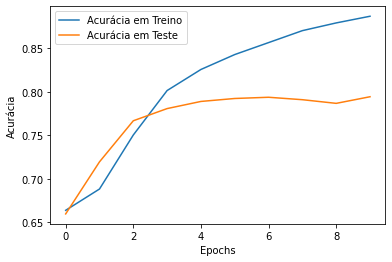

In [38]:
# Plot da Acurácia
plt.plot(modelo.history['accuracy'])
plt.plot(modelo.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend(['Acurácia em Treino', 'Acurácia em Teste'])
plt.show()

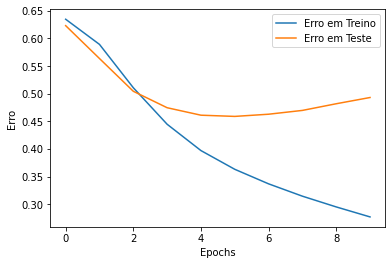

In [39]:
# Plot do Erro
plt.plot(modelo.history['loss'])
plt.plot(modelo.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Erro')
plt.legend(['Erro em Treino', 'Erro em Teste'])
plt.show()

### Detectando Sarcasmo em Novos Dados

In [44]:
# Novos Dados 
# Vamos detectar se cada frase uma das 4 frases abaixo é ou não sarcasmo
texto = ["o corono virus é muito ruim ",
         "fazer exercicios faz bem a saude",
         "Brazil entra em crise política",
         "sorrir faz bem a saude"]

In [45]:
# Precisamos aplicar em novos dados as mesmas transformações aplicadas nos dados de treino e teste
sequences = tokenizer.texts_to_sequences(texto)
padded = pad_sequences(sequences, maxlen = max_length, padding = padding, truncating = trunc)

In [46]:
# Previsões
print(model.predict_classes(padded))

[[0]
 [1]
 [0]
 [1]]


In [47]:
# Vamos associar as previsões a cada frase
for i, frase in enumerate(texto):
    previsao = model.predict_classes(padded)
    if previsao[i] == 0:
        print('\nA Frase <', frase, '> negativo')
    else:
        print('\nA Frase <', frase, '> positivo')


A Frase < o corono virus é muito ruim  > negativo

A Frase < fazer exercicios faz bem a saude > positivo

A Frase < Brazil entra em crise política > negativo

A Frase < sorrir faz bem a saude > positivo


Nosso modelo está funcionando bem e é capaz de detectar se uma frase é ou não sarcasmo!

# Fim